In [1]:
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import zeros

import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class
LabeledSentence = gensim.models.doc2vec.LabeledSentence


from collections import Counter
import string
from string import punctuation

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from matplotlib import pyplot as plt

/Users/saraxia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("Project6500.csv",encoding= 'unicode_escape')
data.drop(['datetime', 'ticker'], axis=1, inplace=True)
data = data[data.sentiment.isnull() == False]
data['sentiment'] = data['sentiment'].map(int)
data = data[data['headline'].isnull() == False]

stop_words = set(stopwords.words('english'))
data['headline']=data['headline'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

table = str.maketrans('', '', punctuation)
data['headline']= [str(w).translate(table) for w in data['headline']]

data

,headline,sentiment
0,MMM fell hard times could set rebound soon,0
1,Wolfe Research Upgrades 3M MMM ¡§Peer Perform¡¨,1
2,3M MMM Upgraded ¡§Peer Perform¡¨ Wolfe Researc...,1
3,MMM insideday follow also opened nice candle c...,1
4,MMM best dividend stock 40 2019 XLI go go please,0
5,MMM 3M The Fallen Dividend King Will Be Back ...,1
6,MMMcelebrates New Year 7 month high close volu...,1
7,MMM 180 baby going higher,1
8,MMMhasnt really done much year looks like seri...,1
9,3M MMM Rating Increased Neutral JPMorgan Chase...,1


In [3]:
vocab = Counter()

for item in data['headline']:
    # split into tokens by white space
    tokens = str(item).split()
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    vocab.update(tokens)

In [4]:
print(len(vocab))

14484


In [5]:
print(vocab.most_common(50))

[('stocks', 1400), ('Co', 1140), ('Stock', 1001), ('Shares', 909), ('Sells', 776), ('Inc', 771), ('Earnings', 649), ('Price', 645), ('Raised', 588), ('Target', 586), ('Group', 559), ('EPS', 551), ('IBM', 544), ('markets', 484), ('PT', 462), ('MSFT', 428), ('Dividend', 427), ('Johnson', 417), ('INTC', 413), ('Lowered', 405), ('higher', 391), ('Rating', 387), ('AAPL', 386), ('Buy', 378), ('JPM', 374), ('The', 369), ('MMM', 361), ('CSCO', 360), ('UNH', 353), ('Insider', 352), ('WMT', 342), ('PG', 330), ('United', 328), ('Technologies', 328), ('Estimates', 323), ('Quarterly', 310), ('PFE', 306), ('HD', 306), ('UTX', 305), ('MCD', 303), ('Research', 298), ('WBA', 296), ('Verizon', 293), ('AXP', 291), ('Gamble', 289), ('Investment', 288), ('JNJ', 287), ('Procter', 285), ('RT', 283), ('CAT', 282)]


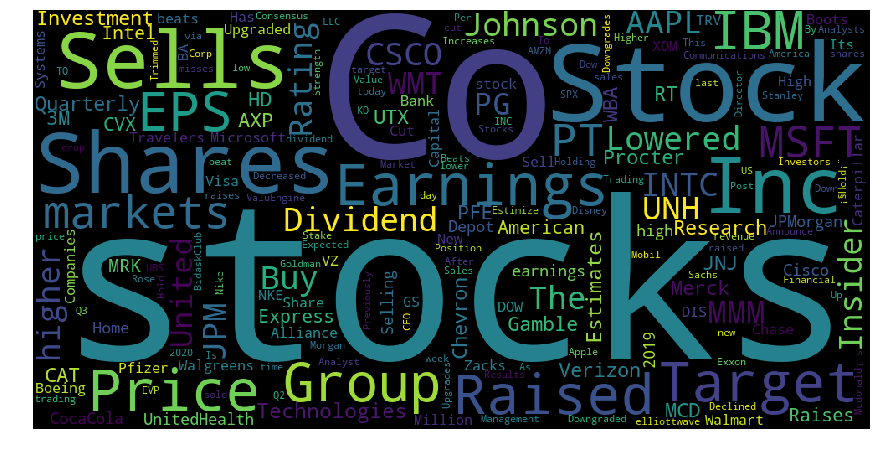

In [6]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(vocab)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [7]:
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

6078


In [8]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data.headline),
                                                    np.array(data.sentiment), test_size=0.2)

In [9]:
len(X_train)

7576

In [10]:
model = Word2Vec(X_train, size=100, window=5, workers=5, min_count=1)

In [11]:
filename = 'embedding_word2vec.txt.word2vec'
model.wv.save_word2vec_format(filename, binary=False)

In [12]:
tokenizer = Tokenizer()
# fit the tokenizer on the training documents
tokenizer.fit_on_texts(X_train)

In [13]:
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(X_train)
# get the max length
max_length = max([len(s.split()) for s in X_train])

In [14]:
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [15]:
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(X_test)
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [16]:
vocab_size = len(tokenizer.word_index) + 1

In [17]:
def load_embedding(filename):
    # load embedding into memory, skip first line
    file = open(filename, 'r')
    lines = file.readlines()
    file.close()
    # create a map of words to vectors
    embedding = dict()
    for line in lines:
        parts = line.split()
        # key is string word, value is numpy array for vector
        embedding[parts[0]] = asarray(parts[1:], dtype='float32')
    return embedding

In [18]:
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        vector = embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
    return weight_matrix

In [19]:
word2vec_embedding = load_embedding('embedding_word2vec.txt.word2vec')
# get vectors in the right order
word2vec_embedding_vectors = get_weight_matrix(word2vec_embedding, tokenizer.word_index)

In [20]:
word2vec_embedding_layer = Embedding(vocab_size, 100, weights=[word2vec_embedding_vectors],
                            input_length=max_length, trainable=False)

In [21]:
model_word2vec = Sequential()
model_word2vec.add(word2vec_embedding_layer)
model_word2vec.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_word2vec.add(MaxPooling1D(pool_size=2))
model_word2vec.add(Flatten())
model_word2vec.add(Dense(1, activation='sigmoid'))
print(model_word2vec.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 100)           1067400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 22, 128)           64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1409      
Total params: 1,132,937
Trainable params: 65,537
Non-trainable params: 1,067,400
_________________________________________________________________
None


In [22]:
# compile network
model_word2vec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history_word2vec=model_word2vec.fit(Xtrain, y_train, epochs=50, validation_split=0.2,verbose=2)

Train on 6060 samples, validate on 1516 samples
Epoch 1/50
 - 1s - loss: 0.7142 - accuracy: 0.5871 - val_loss: 0.6616 - val_accuracy: 0.6234
Epoch 2/50
 - 1s - loss: 0.6773 - accuracy: 0.6045 - val_loss: 0.6646 - val_accuracy: 0.6227
Epoch 3/50
 - 1s - loss: 0.6591 - accuracy: 0.6071 - val_loss: 0.6617 - val_accuracy: 0.6227
Epoch 4/50
 - 1s - loss: 0.6608 - accuracy: 0.6089 - val_loss: 0.6626 - val_accuracy: 0.6220
Epoch 5/50
 - 1s - loss: 0.6533 - accuracy: 0.6104 - val_loss: 0.6652 - val_accuracy: 0.6187
Epoch 6/50
 - 1s - loss: 0.6525 - accuracy: 0.6112 - val_loss: 0.6669 - val_accuracy: 0.6201
Epoch 7/50
 - 1s - loss: 0.6519 - accuracy: 0.6127 - val_loss: 0.6702 - val_accuracy: 0.6168
Epoch 8/50
 - 1s - loss: 0.6509 - accuracy: 0.6119 - val_loss: 0.6701 - val_accuracy: 0.6181
Epoch 9/50
 - 1s - loss: 0.6500 - accuracy: 0.6117 - val_loss: 0.6662 - val_accuracy: 0.6247
Epoch 10/50
 - 1s - loss: 0.6495 - accuracy: 0.6135 - val_loss: 0.6696 - val_accuracy: 0.6201
Epoch 11/50
 - 1s - l

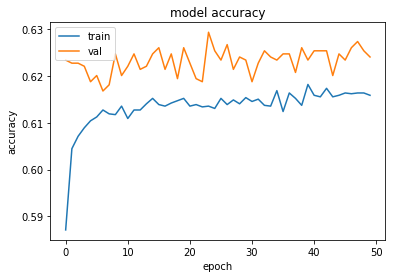

In [24]:
plt.plot(history_word2vec.history['accuracy'])
plt.plot(history_word2vec.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

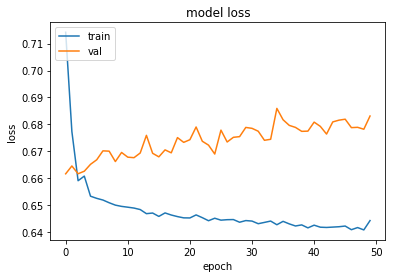

In [25]:
plt.plot(history_word2vec.history['loss'])
plt.plot(history_word2vec.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
#### evaluation
loss, acc = model_word2vec.evaluate(Xtest, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 59.820485


In [27]:
# load embedding from file
raw_embedding = load_embedding('glove.6B.100d.txt')
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [28]:
# define model
model_glove = Sequential()
model_glove.add(embedding_layer)
model_glove.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=2))
model_glove.add(Flatten())
model_glove.add(Dense(1, activation='sigmoid'))
print(model_glove.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 26, 100)           1067400   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 128)           64128     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1409      
Total params: 1,132,937
Trainable params: 65,537
Non-trainable params: 1,067,400
_________________________________________________________________
None


In [29]:
# compile network
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history_glove=model_glove.fit(Xtrain, y_train, epochs=50,validation_split=0.2, verbose=2)

Train on 6060 samples, validate on 1516 samples
Epoch 1/50
 - 1s - loss: 0.5034 - accuracy: 0.7546 - val_loss: 0.4004 - val_accuracy: 0.8226
Epoch 2/50
 - 1s - loss: 0.2931 - accuracy: 0.8820 - val_loss: 0.3325 - val_accuracy: 0.8562
Epoch 3/50
 - 1s - loss: 0.1829 - accuracy: 0.9391 - val_loss: 0.3315 - val_accuracy: 0.8720
Epoch 4/50
 - 1s - loss: 0.1107 - accuracy: 0.9736 - val_loss: 0.2902 - val_accuracy: 0.8826
Epoch 5/50
 - 1s - loss: 0.0633 - accuracy: 0.9916 - val_loss: 0.2821 - val_accuracy: 0.8819
Epoch 6/50
 - 1s - loss: 0.0392 - accuracy: 0.9977 - val_loss: 0.2903 - val_accuracy: 0.8912
Epoch 7/50
 - 1s - loss: 0.0238 - accuracy: 0.9987 - val_loss: 0.3057 - val_accuracy: 0.8826
Epoch 8/50
 - 1s - loss: 0.0182 - accuracy: 0.9988 - val_loss: 0.3079 - val_accuracy: 0.8912
Epoch 9/50
 - 1s - loss: 0.0136 - accuracy: 0.9990 - val_loss: 0.3111 - val_accuracy: 0.8945
Epoch 10/50
 - 1s - loss: 0.0108 - accuracy: 0.9992 - val_loss: 0.3198 - val_accuracy: 0.8958
Epoch 11/50
 - 1s - l

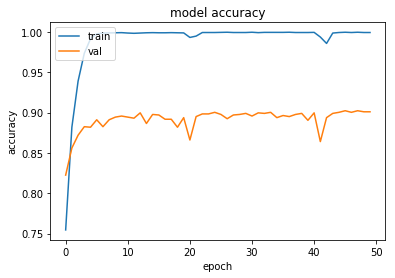

In [30]:
plt.plot(history_glove.history['accuracy'])
plt.plot(history_glove.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

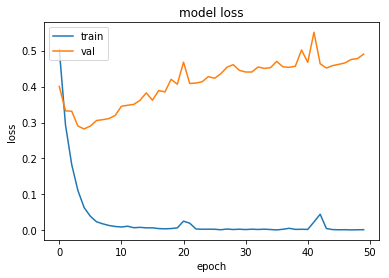

In [31]:
plt.plot(history_glove.history['loss'])
plt.plot(history_glove.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
# evaluation
loss, acc = model_glove.evaluate(Xtest, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 89.229143


In [33]:
import re
import fasttext

In [34]:
# Write the test file.
with open("./test.txt", "w") as test_file_handler:
    for X_test_entry, y_test_entry in zip(X_test, y_test):
        line_to_write = "__label__" + str(y_test_entry) + "\t" + str(X_test_entry) + "\n"
        try:
            test_file_handler.write(line_to_write)
        except:
            print(line_to_write)
            break

In [35]:
# Write the train file.
with open("./train.txt", "w") as train_file_handler:
    for X_train_entry, y_train_entry in zip(X_train, y_train):
        line_to_write = "__label__" + str(y_train_entry) + "\t" + str(X_train_entry) + "\n"
        try:
            train_file_handler.write(line_to_write)
        except:
            print(line_to_write)
            break

In [36]:
model = fasttext.train_supervised(input="./train.txt")

In [37]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))

results = model.test("./test.txt")
print_results(*results)

N	1894
P@1	0.949
